In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [612]:
#load food production data

dfp = pd.read_csv('Africa Food Production (2004 - 2013).csv')
dfp.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [325]:
dfp['Year'] = pd.to_datetime(dfp['Year'], format='%Y')
dfp

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004-01-01,2731
1,Algeria,Wheat and products,2005-01-01,2415
2,Algeria,Wheat and products,2006-01-01,2688
3,Algeria,Wheat and products,2007-01-01,2319
4,Algeria,Wheat and products,2008-01-01,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009-01-01,0
23106,Zimbabwe,Crustaceans,2010-01-01,0
23107,Zimbabwe,Crustaceans,2011-01-01,0
23108,Zimbabwe,Crustaceans,2012-01-01,0


In [326]:
dfp['Value'] = dfp['Value'].apply(lambda x:"{:.f}kt".format((x/1)))

ValueError: Format specifier missing precision

In [328]:
cgp = dfp.groupby(['Country', 'Year', 'Item'])['Value'].sum()

In [329]:
cgp = pd.DataFrame(cgp)

In [330]:
cgp.head()

Value
Country Year       Item                      
Algeria 2004-01-01 Apples and products    165
                   Bananas                  0
                   Barley and products   1212
                   Beans                    2
                   Beer                   110

In [331]:
cgp.groupby(['Country', 'Year',])['Value'].sum()

Country   Year      
Algeria   2004-01-01    15536
          2005-01-01    15667
          2006-01-01    16417
          2007-01-01    14763
          2008-01-01    13841
                        ...  
Zimbabwe  2009-01-01     5754
          2010-01-01     6777
          2011-01-01     7551
          2012-01-01     8173
          2013-01-01     7914
Name: Value, Length: 450, dtype: int64

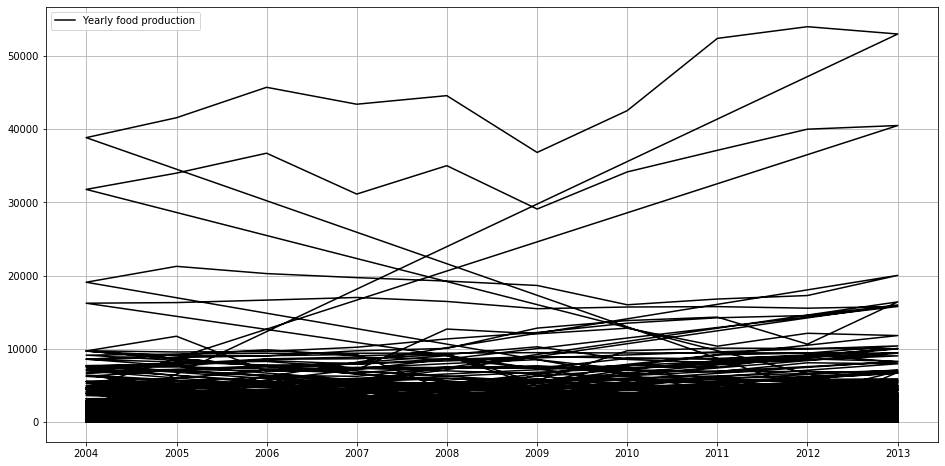

In [388]:
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(dfp['Year'], dfp['Value'], label='Yearly food production', color='black')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [332]:
dfs = pd.read_csv('Africa Food Supply (2004 - 2013).csv')

In [808]:
dfs.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [809]:
cgs = dfs.groupby(['Country', 'Year'])['Value'].sum()

In [810]:
cgs = pd.DataFrame(cgs)

In [811]:
cgs

Value
Country  Year       
Algeria  2004   2987
         2005   2958
         2006   3047
         2007   3041
         2008   3048
...              ...
Zimbabwe 2009   2147
         2010   2168
         2011   2200
         2012   2197
         2013   2110

[450 rows x 1 columns]

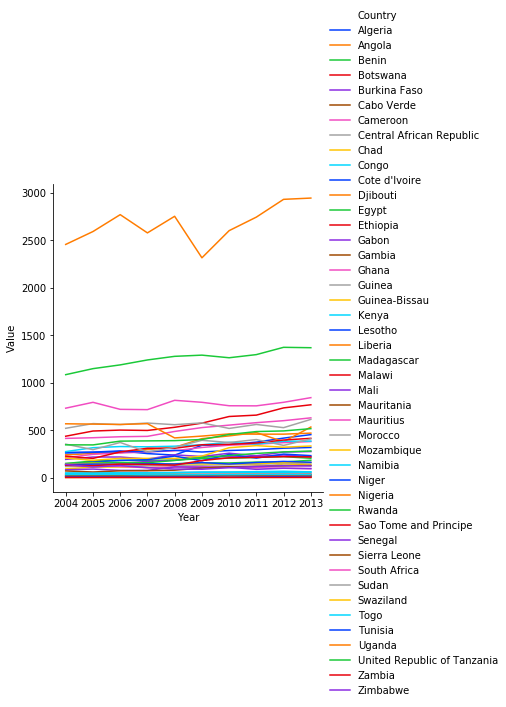

In [337]:
(['Country', 'Year', 'Item'])['Value'].sum()

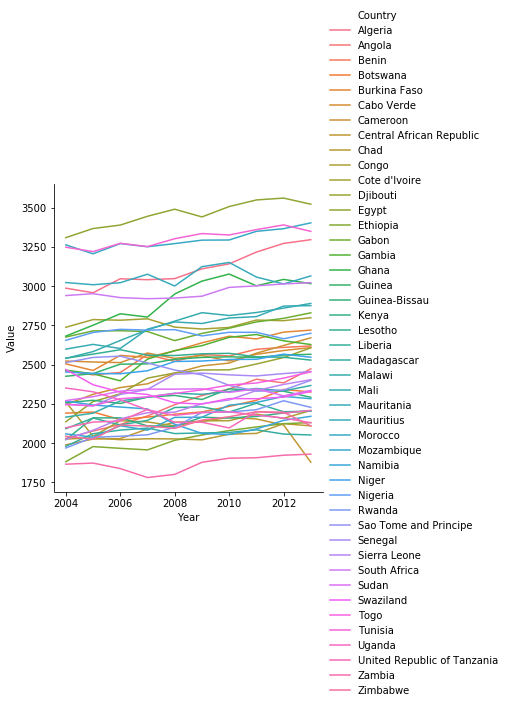

In [237]:
sns.relplot('Year', 'Value','Country', data=df2, kind='line', ci=None)

In [ ]:
# Checking for outliers

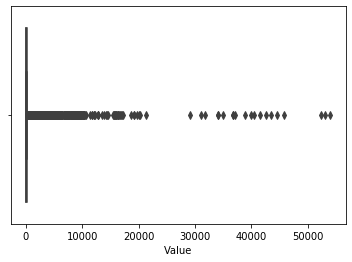

In [338]:
sns.boxplot('Value', data=dfp)

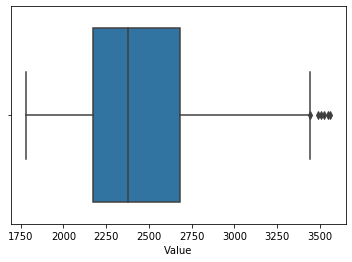

In [339]:
sns.boxplot('Value', data=dfs)

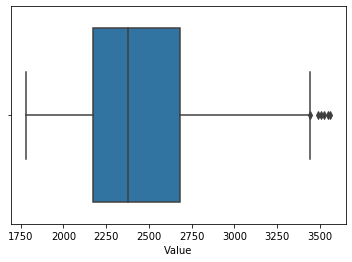

In [340]:
sns.boxplot(dfs['Value'])

In [341]:
dfs.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


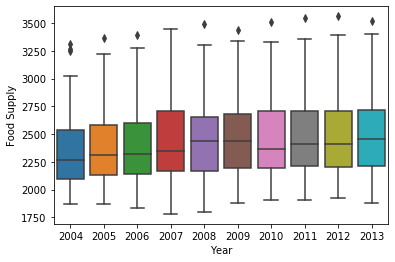

In [342]:
outlier= sns.boxplot(x='Year', y='Value', data=dfs)
outlier.set(ylabel = 'Food Supply')
outlier

In [343]:
dfs.isnull().sum().sum()

0

In [375]:
dfs_2012 = dfs[dfs['Year'] == 2012]
dfs_2012

,Country,Year,Value
8,Algeria,2012,3272
18,Angola,2012,2384
28,Benin,2012,2610
38,Botswana,2012,2342
48,Burkina Faso,2012,2707
58,Cabo Verde,2012,2590
68,Cameroon,2012,2622
78,Central African Republic,2012,2116
88,Chad,2012,2124
98,Congo,2012,2158


In [376]:
cg1.isnull().sum().any()

False

In [377]:
sorted(dfs_2012)

['Country', 'Value', 'Year']

In [378]:
# Finding the outlier in 2012 using InterQuatileRange Method
quantile1, quantile3 = np.percentile(dfs_2012['Value'],[25,75])
print(quantile1, quantile3)

2200.0 2707.0


In [379]:
#find the IQR
iqr_value=quantile3-quantile1
print(iqr_value)

507.0


In [372]:
#finding the lower bond value and the higher bond value
lower_bound_val = quantile1 -(1.5 * iqr_value)
upper_bound_val = quantile3 +(1.5 * iqr_value)


In [373]:
print(lower_bound_val, upper_bound_val)

1439.5 3467.5


In [381]:
target = dfs_2012
upper_bound_val = 3467.5
lower_bound_val = 1439.5
upper_outlier = target[target.Value>upper_bound_val]
lower_outlier = target[target.Value<lower_bound_val]

outlier = pd.concat([upper_outlier, lower_outlier])
outlier

,Country,Year,Value
128,Egypt,2012,3561


In [522]:
country_code = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv')
country_code.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


In [595]:
#import the poplation data
country_pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv', header=2)
country_pop
country_pop = country_pop[['Country Name', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']]
country_pop

,Country Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0
1,Afghanistan,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0
2,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
3,Albania,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0
4,Andorra,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0
...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
260,"Yemen, Rep.",19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0
261,South Africa,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0
262,Zambia,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0


In [781]:
cp = country_pop.rename(columns={'Country Name':'Country'})
cp

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0
1,Afghanistan,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0
2,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
3,Albania,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0
4,Andorra,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0
...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
260,"Yemen, Rep.",19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0
261,South Africa,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0
262,Zambia,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0


In [782]:
cp.columns

Index(['Country', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [783]:
# merge country population saved as cp and food production dataset
cp_dfs = pd.merge(cp, dfs)
cp_dfs

,Country,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Year,Value
0,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,2004,2030
1,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,2005,2077
2,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,2006,2119
3,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,2007,2173
4,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,2008,2245
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Zimbabwe,12019912.0,12076699.0,12155491.0,12255922.0,12379549.0,12526968.0,12697723.0,12894316.0,13115131.0,13350356.0,2009,2147
396,Zimbabwe,12019912.0,12076699.0,12155491.0,12255922.0,12379549.0,12526968.0,12697723.0,12894316.0,13115131.0,13350356.0,2010,2168
397,Zimbabwe,12019912.0,12076699.0,12155491.0,12255922.0,12379549.0,12526968.0,12697723.0,12894316.0,13115131.0,13350356.0,2011,2200
398,Zimbabwe,12019912.0,12076699.0,12155491.0,12255922.0,12379549.0,12526968.0,12697723.0,12894316.0,13115131.0,13350356.0,2012,2197


In [784]:
cp_dfs = pd.melt(cp_dfs, id_vars=['Country', 'Value'], var_name='Year')
cp_dfs.head()

,Country,Value,Year,value
0,Angola,2030,2004,18758145.0
1,Angola,2077,2004,18758145.0
2,Angola,2119,2004,18758145.0
3,Angola,2173,2004,18758145.0
4,Angola,2245,2004,18758145.0


In [785]:
cp_dfs.rename(columns={'value':'Pop Mean Value'}, inplace = True)
cp_dfs

,Country,Value,Year,Pop Mean Value
0,Angola,2030,2004,18758145.0
1,Angola,2077,2004,18758145.0
2,Angola,2119,2004,18758145.0
3,Angola,2173,2004,18758145.0
4,Angola,2245,2004,18758145.0
...,...,...,...,...
4395,Zimbabwe,2147,Year,2009.0
4396,Zimbabwe,2168,Year,2010.0
4397,Zimbabwe,2200,Year,2011.0
4398,Zimbabwe,2197,Year,2012.0


In [788]:
cp_dfs.isnull().sum()

Country           0
Value             0
Year              0
Pop Mean Value    0
dtype: int64

In [818]:
cp_dfs = cp_dfs.groupby(['Year','Value','Pop Mean Value']).mean()
cp_dfs.head()

DataError: No numeric types to aggregate

In [639]:
dfp

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [615]:
dfp.columns

Index(['Country', 'Item', 'Year', 'Value'], dtype='object')

In [703]:
#rice data 
rice_data = dfp_rice = dfp[dfp['Item'] == 'Rice (Milled Equivalent)']
rice_data.head()

,Country,Item,Year,Value
10,Algeria,Rice (Milled Equivalent),2004,0
11,Algeria,Rice (Milled Equivalent),2005,0
12,Algeria,Rice (Milled Equivalent),2006,0
13,Algeria,Rice (Milled Equivalent),2007,0
14,Algeria,Rice (Milled Equivalent),2008,0


In [815]:
#mean rice production yearly
rice_data = rice_data.groupby(['Year']).mean()
rice_data.head()

,Mean Value
Year,
2004,326.789474
2005,348.763158
2006,379.026316
2007,361.500000
2008,420.289474


In [816]:
rice_data.rename(columns={'Value':'Mean Value'}, inplace=True)
rice_data

,Mean Value
Year,
2004,326.789474
2005,348.763158
2006,379.026316
2007,361.500000
2008,420.289474
2009,405.842105
2010,457.315789
2011,454.157895
2012,482.394737


In [817]:
sns.relplot('Year', 'Mean Value', data=rice_data, kind='line', ci=None)

ValueError: Could not interpret input 'Year'

# quiz section

In [789]:
dfp

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [797]:
dfp_2010 = dfp[dfp['Year'] == 2010]
dfp_2010

,Country,Item,Year,Value
6,Algeria,Wheat and products,2010,2605
16,Algeria,Rice (Milled Equivalent),2010,0
26,Algeria,Barley and products,2010,1308
36,Algeria,Maize and products,2010,0
46,Algeria,Oats,2010,88
...,...,...,...,...
23066,Zimbabwe,"Fats, Animals, Raw",2010,7
23076,Zimbabwe,Eggs,2010,30
23086,Zimbabwe,Milk - Excluding Butter,2010,396
23096,Zimbabwe,Freshwater Fish,2010,13


In [799]:
oat_data = dfp_2010 = dfp_2010[dfp_2010['Item'] == 'Oats']
oat_data

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
7746,Ghana,Oats,2010,0
9286,Kenya,Oats,2010,3
10026,Lesotho,Oats,2010,0
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1


In [801]:
dfs

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [803]:
dfs_q = dfs.groupby(['Country', 'Year']).mean()
dfs_q.head()

Value
Country Year       
Algeria 2004   2987
        2005   2958
        2006   3047
        2007   3041
        2008   3048

In [804]:
dfs_2004 = dfs[dfs['Year'] == 2004]
dfs_2004

,Country,Year,Value
0,Algeria,2004,2987
10,Angola,2004,2030
20,Benin,2004,2461
30,Botswana,2004,2191
40,Burkina Faso,2004,2505
50,Cabo Verde,2004,2523
60,Cameroon,2004,2246
70,Central African Republic,2004,1989
80,Chad,2004,2026
90,Congo,2004,2263


In [805]:
dfs_2005 = dfs[dfs['Year'] == 2005]
dfs_2005

,Country,Year,Value
1,Algeria,2005,2958
11,Angola,2005,2077
21,Benin,2005,2435
31,Botswana,2005,2198
41,Burkina Faso,2005,2463
51,Cabo Verde,2005,2517
61,Cameroon,2005,2311
71,Central African Republic,2005,2026
81,Chad,2005,2034
91,Congo,2005,2043


In [806]:
dfs_2006 = dfs[dfs['Year'] == 2006]
dfs_2006

,Country,Year,Value
2,Algeria,2006,3047
12,Angola,2006,2119
22,Benin,2006,2450
32,Botswana,2006,2150
42,Burkina Faso,2006,2559
52,Cabo Verde,2006,2513
62,Cameroon,2006,2354
72,Central African Republic,2006,2029
82,Chad,2006,2022
92,Congo,2006,2143


In [807]:
dfs

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197
